In [10]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ───────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [1]:
cases <- readRDS("../data/cases_controls/cases_controls_rds_format/all_samples_normalized_CASES.rds")
controls <- readRDS("../data/cases_controls/cases_controls_rds_format/all_samples_normalized_CONTROLS.rds")
head(cases)

cases <- cases[1:1000, ]
controls <- controls[1:10000, ]

sample,bin,X30,X31,X32,X33,X34,X35,X36,X37,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
PGDX10344P1,chr10_400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_401,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_402,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_403,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
sample_types <- read.table("../data/sample_types.txt", header = F, sep = " ")
colnames(sample_types) <- c("sample", "sample_type")
head(sample_types)
dim(sample_types)

sample,sample_type
PGDX10344P1,Gastric_cancer
PGDX10346P1,Gastric_cancer
PGDX10349P1,Gastric_cancer
PGDX10351P1,Gastric_cancer
PGDX10566P,Ovarian_Cancer
PGDX10567P,Ovarian_Cancer


[1] 473   2

In [4]:
dim(controls)

[1] 10000   673

In [5]:
controls_mean <- colMeans(controls[3:673])
head(controls_mean)

X30          X31          X32          X33          X34          X35 
1.044860e-06 1.309478e-06 1.104301e-06 1.138503e-06 1.149478e-06 1.322614e-06

In [18]:
counts_mean_tibble <- tibble(healthy = controls_mean)
head(counts_mean_tibble)

healthy
1.044860e-06
1.309478e-06
1.104301e-06
1.138503e-06
1.149478e-06
1.322614e-06


In [19]:
data <- merge(sample_types,cases, by="sample")
head(data)

sample,sample_type,bin,X30,X31,X32,X33,X34,X35,X36,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
PGDX10344P1,Gastric_cancer,chr10_400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,Gastric_cancer,chr10_40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,Gastric_cancer,chr10_4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,Gastric_cancer,chr10_401,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,Gastric_cancer,chr10_402,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,Gastric_cancer,chr10_403,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
classes <- unique(data$sample_type)
for (i in 1:length(classes)){
    data_1_type <- data %>% filter(sample_type == classes[i]) %>% select(-c(sample, sample_type, bin))
    colmean_1_type <- colMeans(data_1_type)
    counts_mean_tibble <- cbind(counts_mean_tibble, tibble("{classes[i]}" := colmean_1_type))
}

In [21]:
head(counts_mean_tibble)

healthy,Gastric_cancer
1.044860e-06,5.051623e-07
1.309478e-06,2.396358e-07
1.104301e-06,1.956613e-06
1.138503e-06,6.647066e-07
1.149478e-06,1.327573e-06
1.322614e-06,1.252558e-06


In [26]:

p1 <- ggplot() + geom_col(aes(x = colnames(controls)[3:673], y = counts_mean_tibble$healthy))

In [27]:
p2 <- ggplot() + geom_col(aes(x = colnames(controls)[3:673], y = counts_mean_tibble$Gastric_cancer))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


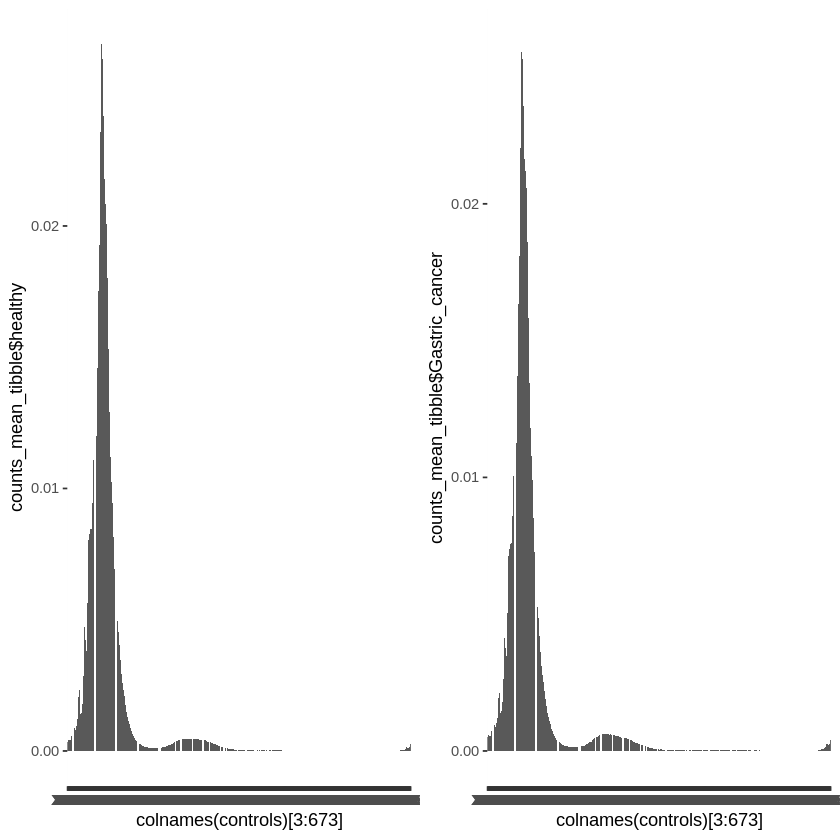

In [29]:
install.packages("cowplot")
library(cowplot)

plot_grid(p1, p2, ncol = 2, align = "v")